<a href="https://colab.research.google.com/github/QuangHPV/sc1015-project/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [1]:
!git clone https://github.com/QuangHPV/sc1015-project.git

Cloning into 'sc1015-project'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 33 (delta 4), reused 19 (delta 1), pack-reused 0
Receiving objects: 100% (33/33), 8.92 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (4/4), done.



---

After performing some cleaning process, we are introducing into some ways to look into the data. We will use the data to solve **Classification** problem: we will try to predict whether Tomorrow will rain or not, based on some predictors, both **numerical** and **categorical**


---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset on Credit Rating : Attached file `weatherAUS_cleaned.csv`     
You know by now what to do with any dataset after you import it.

In [3]:
df = pd.read_csv('/content/sc1015-project/data/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

- The dataset consists of 23 variables/features/columns and 145460 observations/samples/rows.
- The response variable could be RainTomorrow, which indicates a classification target, with the remaining 22 variables as potential predictors.
- There are 16 variables identified as float64 by default, suggesting they are numeric and continuous.
- There are 7 variables identified as obhect by default, which indicates represent categories.


# Explore Data Analysis

Let's start by exploring the response variable `RainTomorrow`, the one we are supposed to predict at the end of the day.

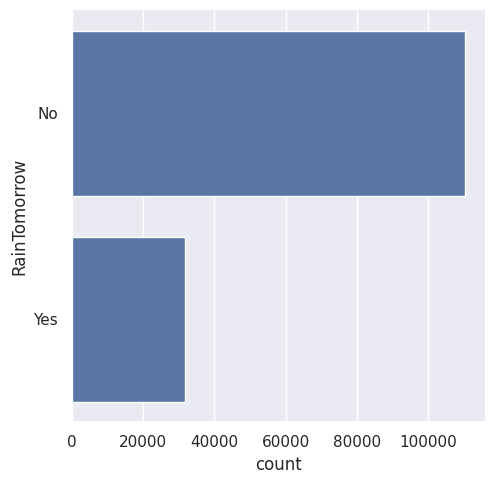

In [5]:
#Rain Tomorrow
sb.catplot(y = 'RainTomorrow', data = df, kind = "count")

In [6]:
countNotRain, countRain = df['RainTomorrow'].value_counts()
print("Ratio of classes is NotRain : Rain = ", countNotRain, ":", countRain)

Ratio of classes is NotRain : Rain =  110316 : 31877


Alright. We see a large class imbalance in RainTomorrow variable.     
Unless we fix this, Classification models may face some problems.    

Anyway, let's go ahead as it is, for the time being. May be later I will come back to deal with this imbalance data

Now, I should find out a categorical object and try to understand what they means.

In [7]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Before further process, let us removing missing data

In [21]:
df = df.dropna()


Then I will find out the unique values, which can help us to predict RainTomorrow easily. First, let's come with `Location`

In [22]:
df['Location'].unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

These are probably some places in Australia. There maybe some places that are more likely to rain in Australia, so we do not remove them

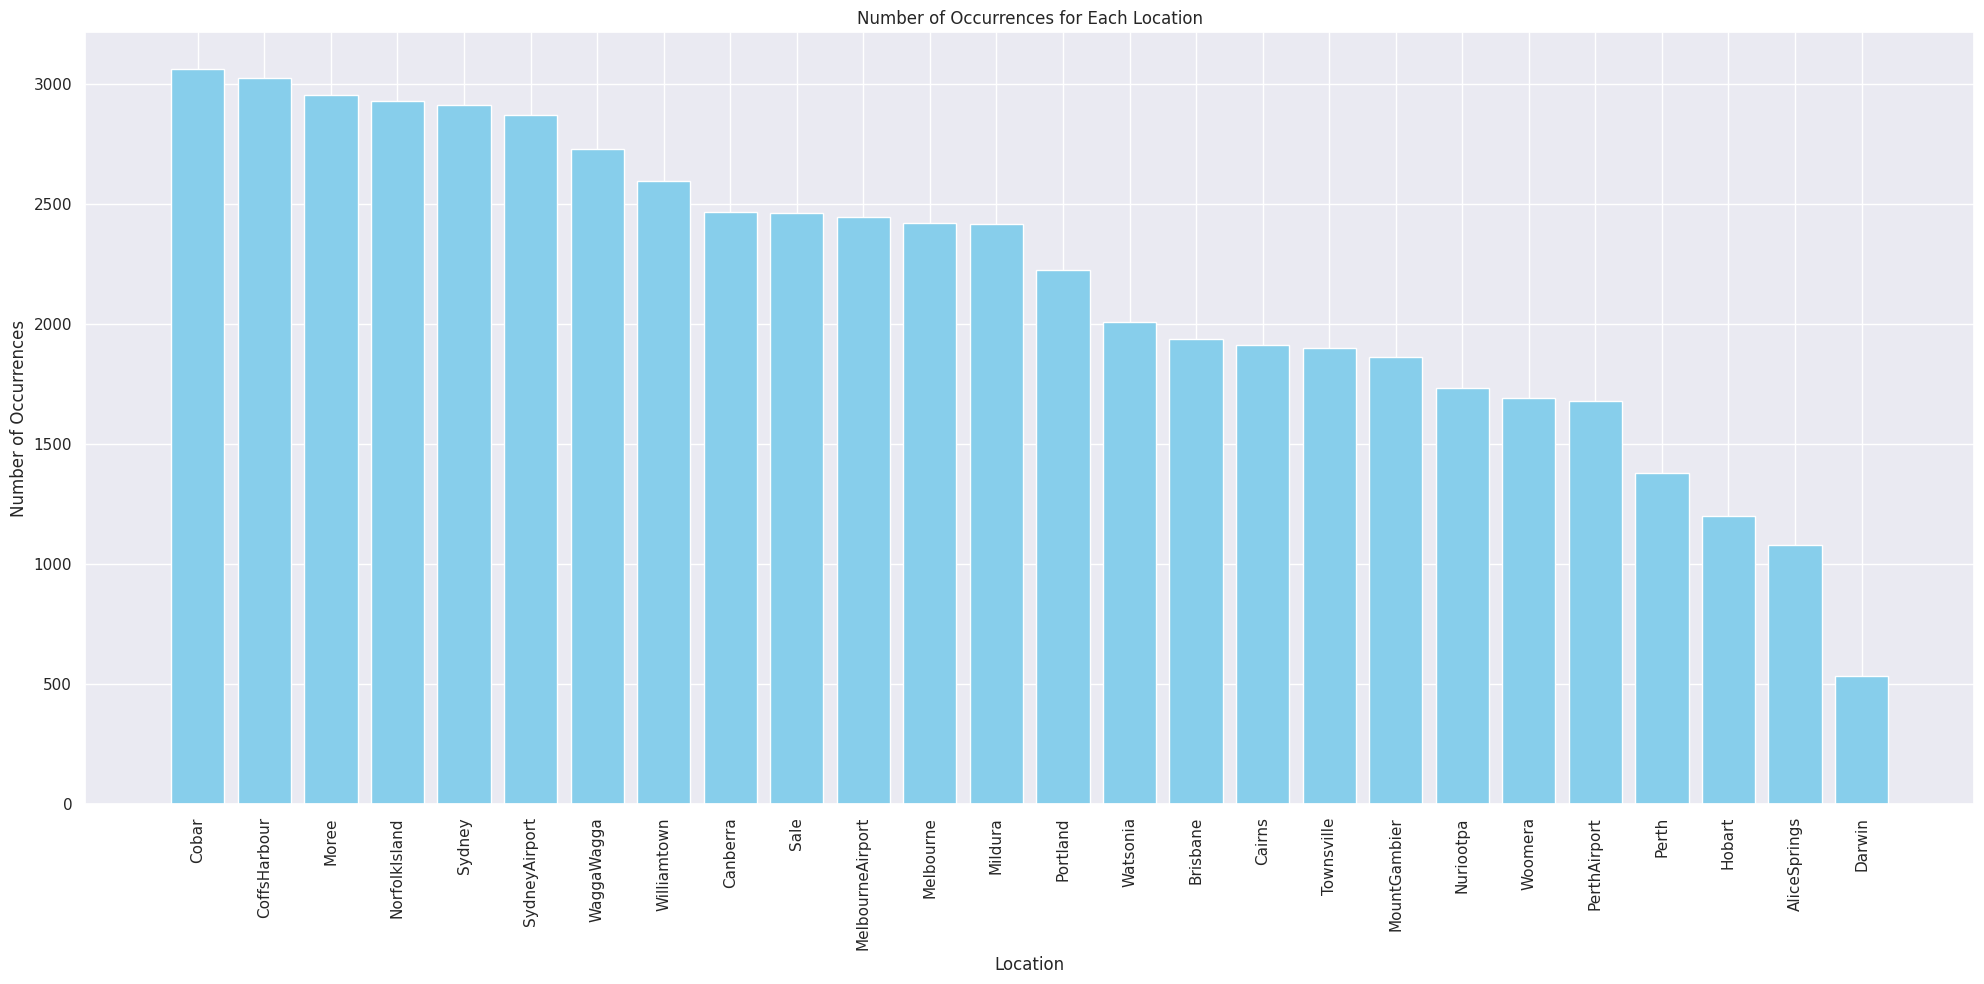

In [23]:
plt.figure(figsize=(20,10))
plt.bar(df['Location'].unique(), df['Location'].value_counts(), color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences for Each Location')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

Similarly, for `WindGustDir`, `WindDir9am`, and `WindDir3pm`

In [24]:
df['WindGustDir'].unique()

array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

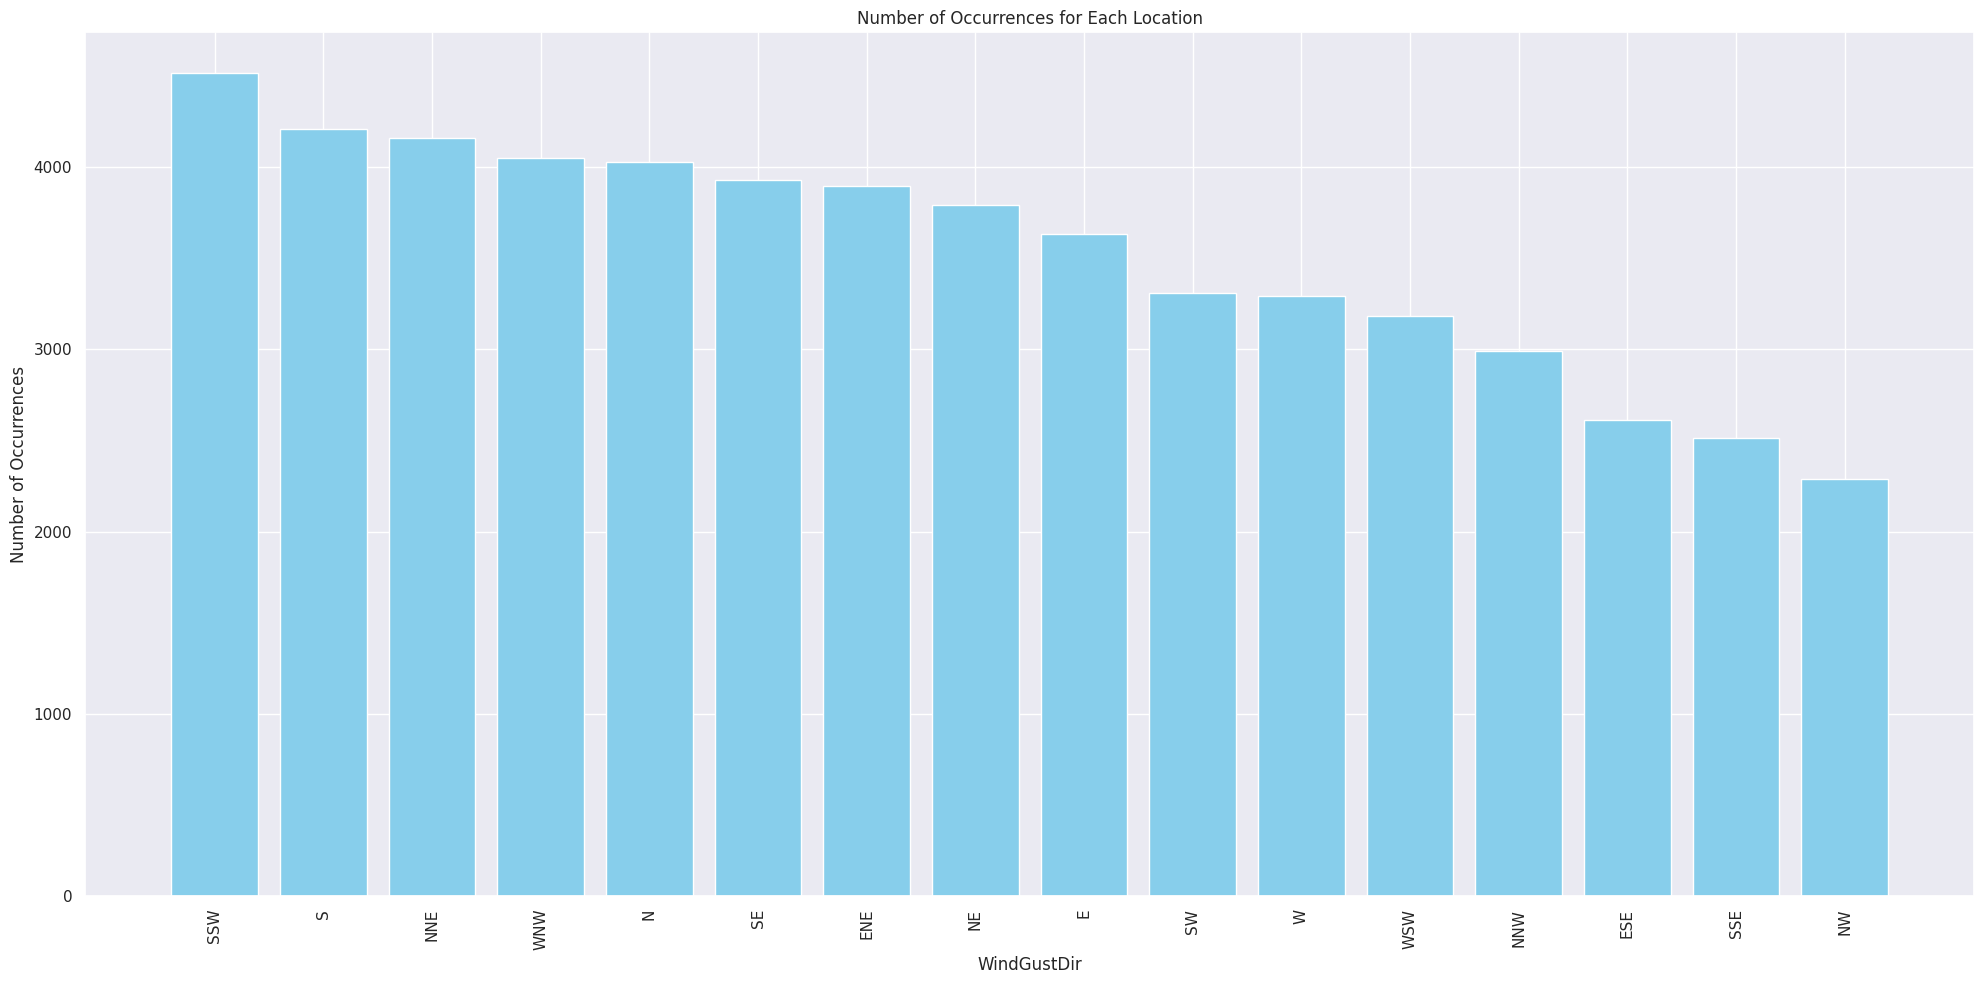

In [31]:
plt.figure(figsize=(20,10))
plt.bar(df['WindGustDir'].unique(), df['WindGustDir'].value_counts(), color='skyblue')
plt.xlabel('WindGustDir')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences for Each Location')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

In [26]:
df['WindDir9am'].unique()

array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

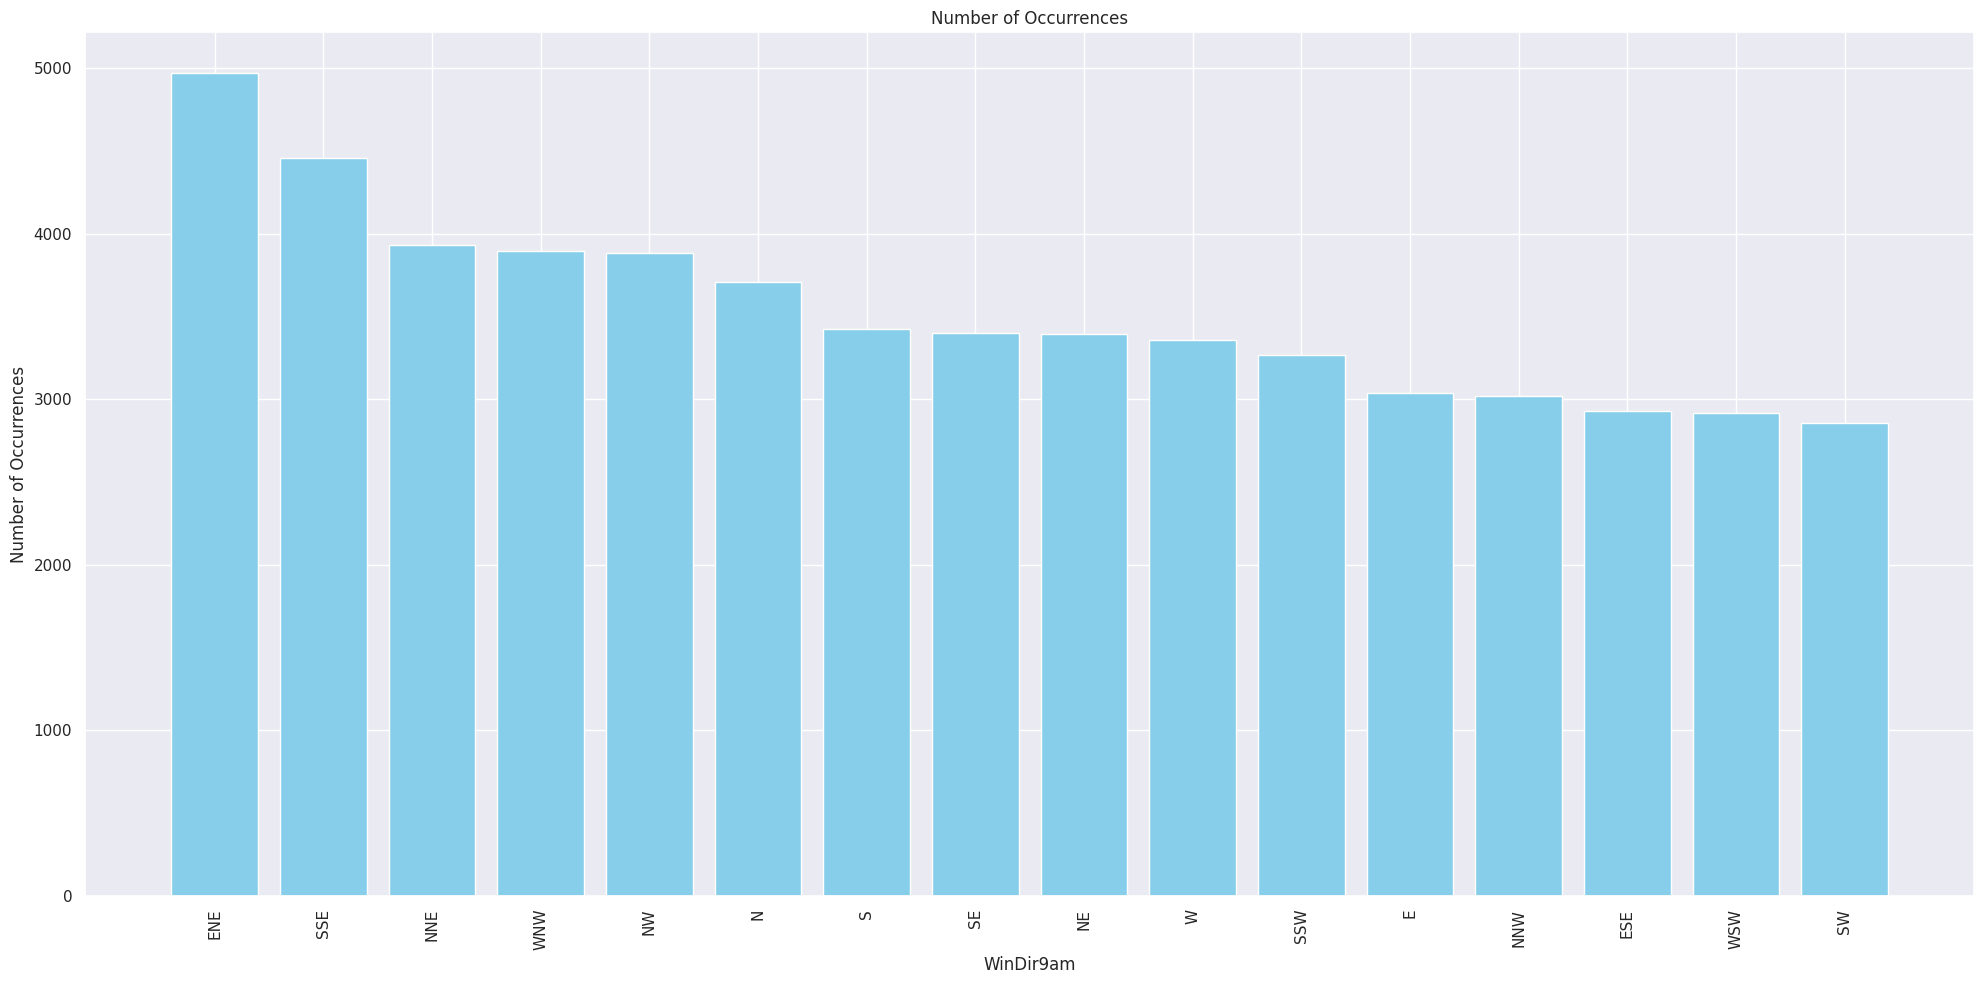

In [33]:
plt.figure(figsize=(20,10))
plt.bar(df['WindDir9am'].unique(), df['WindDir9am'].value_counts(), color='skyblue')
plt.xlabel('WinDir9am')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

In [29]:
df['WindDir3pm'].unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

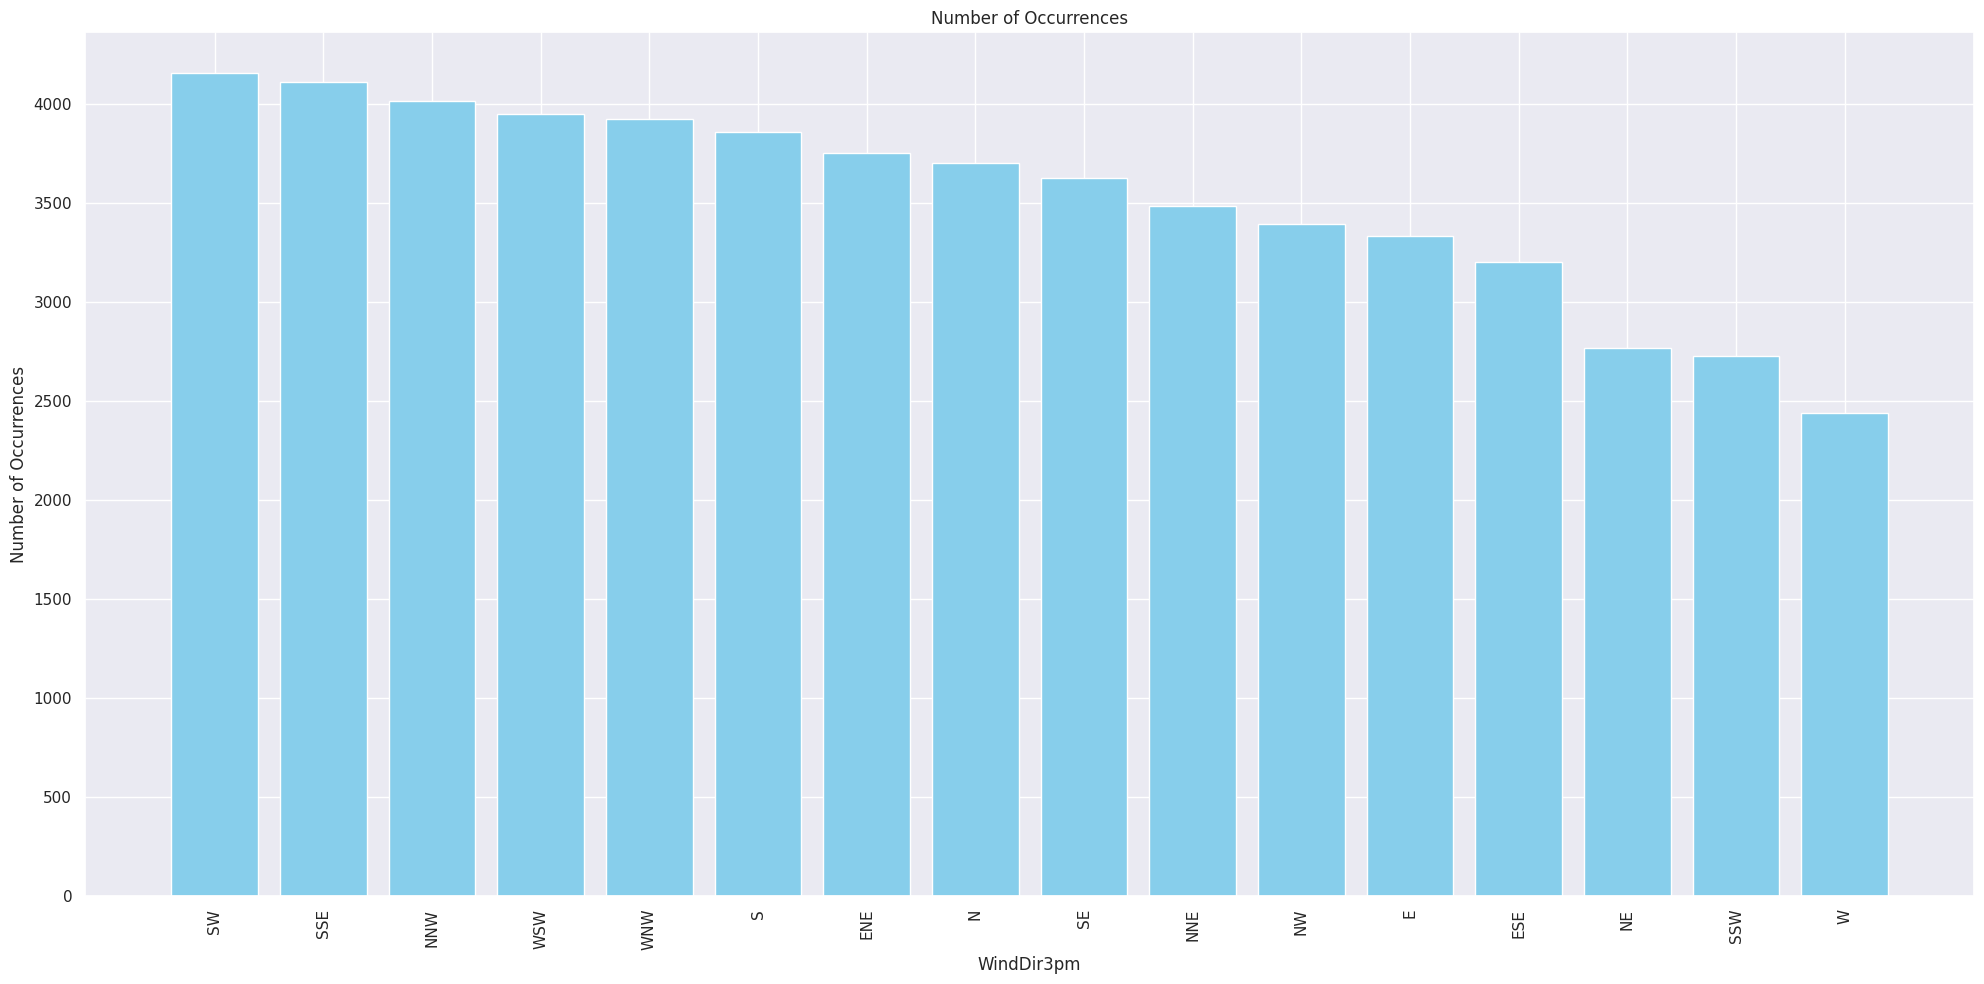

In [32]:
plt.figure(figsize=(20,10))
plt.bar(df['WindDir3pm'].unique(), df['WindDir3pm'].value_counts(), color='skyblue')
plt.xlabel('WindDir3pm')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

Here, `Cloud9am` and `Cloud3pm` also categorial values, ranging from 0-8, but are saved as float. Let's figure out

In [34]:
df['Cloud9am'].unique()

array([2., 1., 8., 3., 0., 4., 7., 5., 6.])

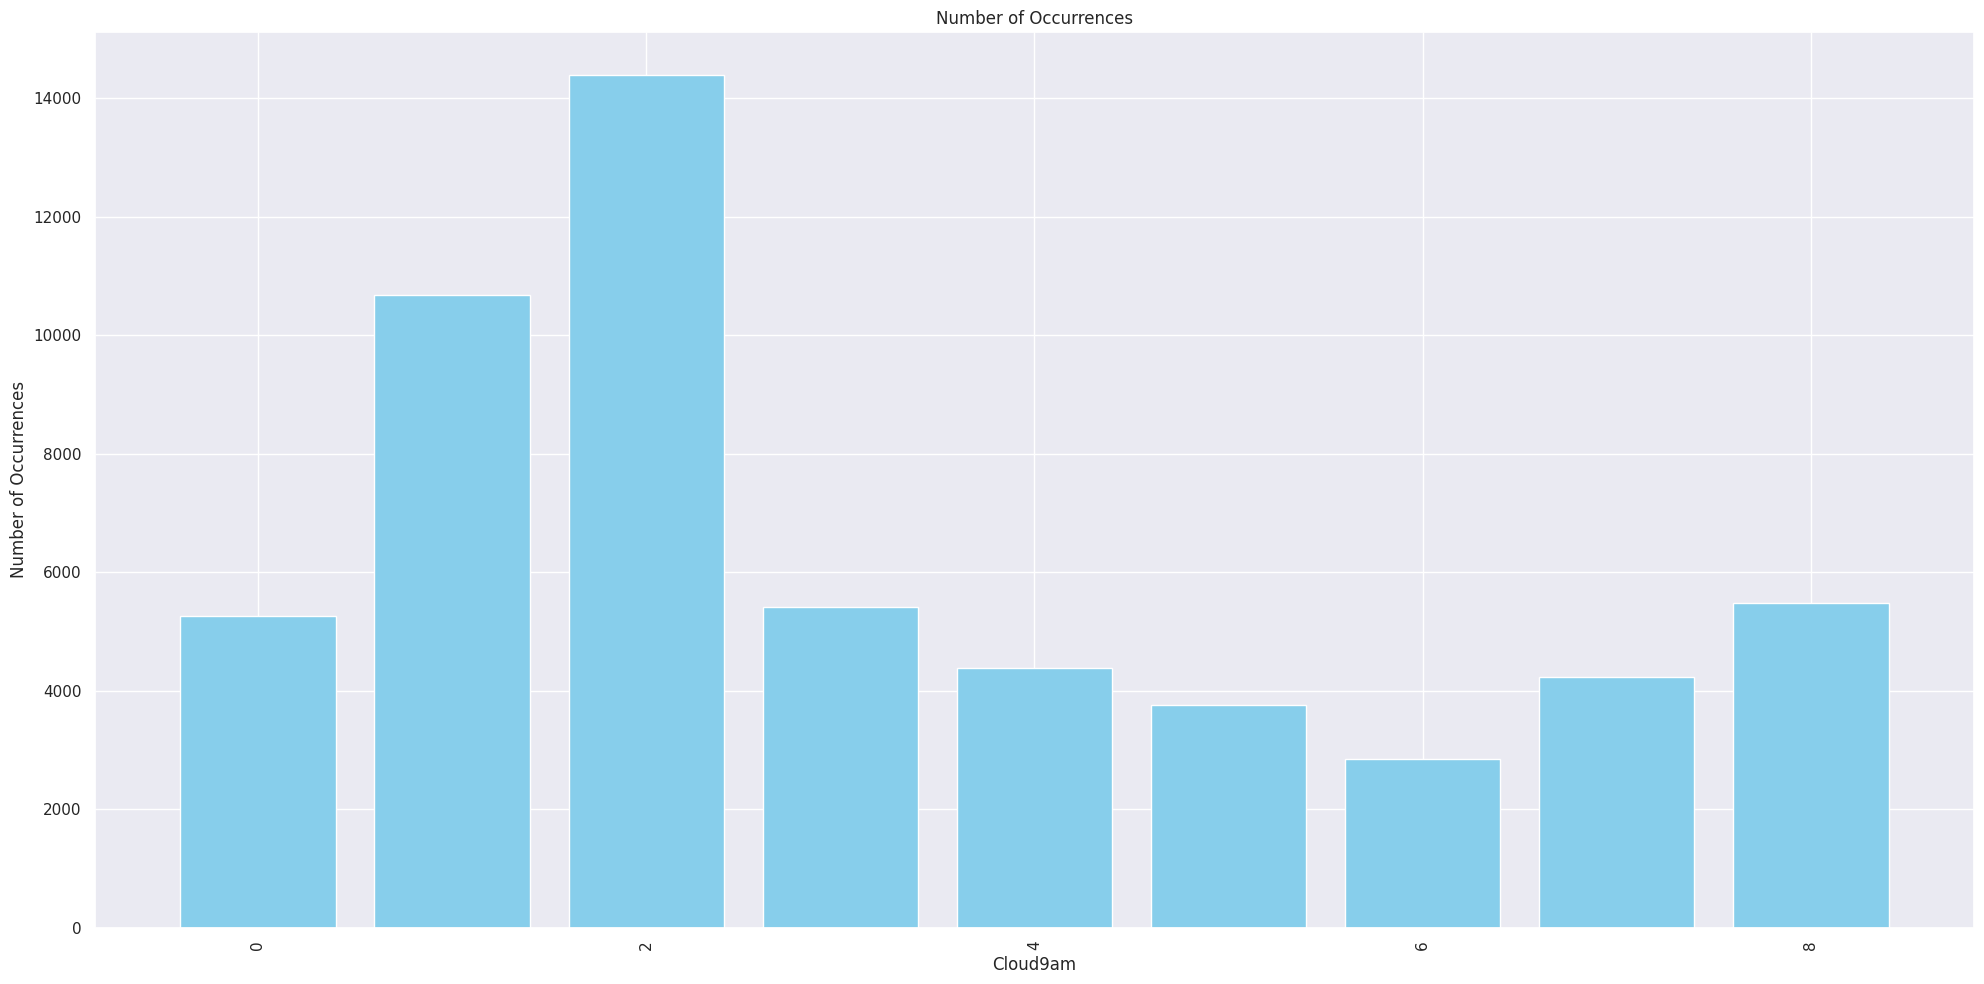

In [36]:
plt.figure(figsize=(20,10))
plt.bar(df['Cloud9am'].unique(), df['Cloud9am'].value_counts(), color='skyblue')
plt.xlabel('Cloud9am')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

In [39]:
df['Cloud3pm'].unique()

array([5., 1., 6., 8., 2., 3., 0., 7., 4., 9.])

In [46]:
df.loc[df['Cloud3pm'] == 9] # only 1 sample

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
106933  2012-11-02  Woomera     10.6     24.6       0.2         11.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
106933      11.4         SSE           39.0         SE  ...        45.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
106933         13.0       1019.0       1015.2       6.0       9.0     14.8   

        Temp3pm  RainToday  RainTomorrow  
106933     23.7         No            No  

[1 rows x 23 columns]

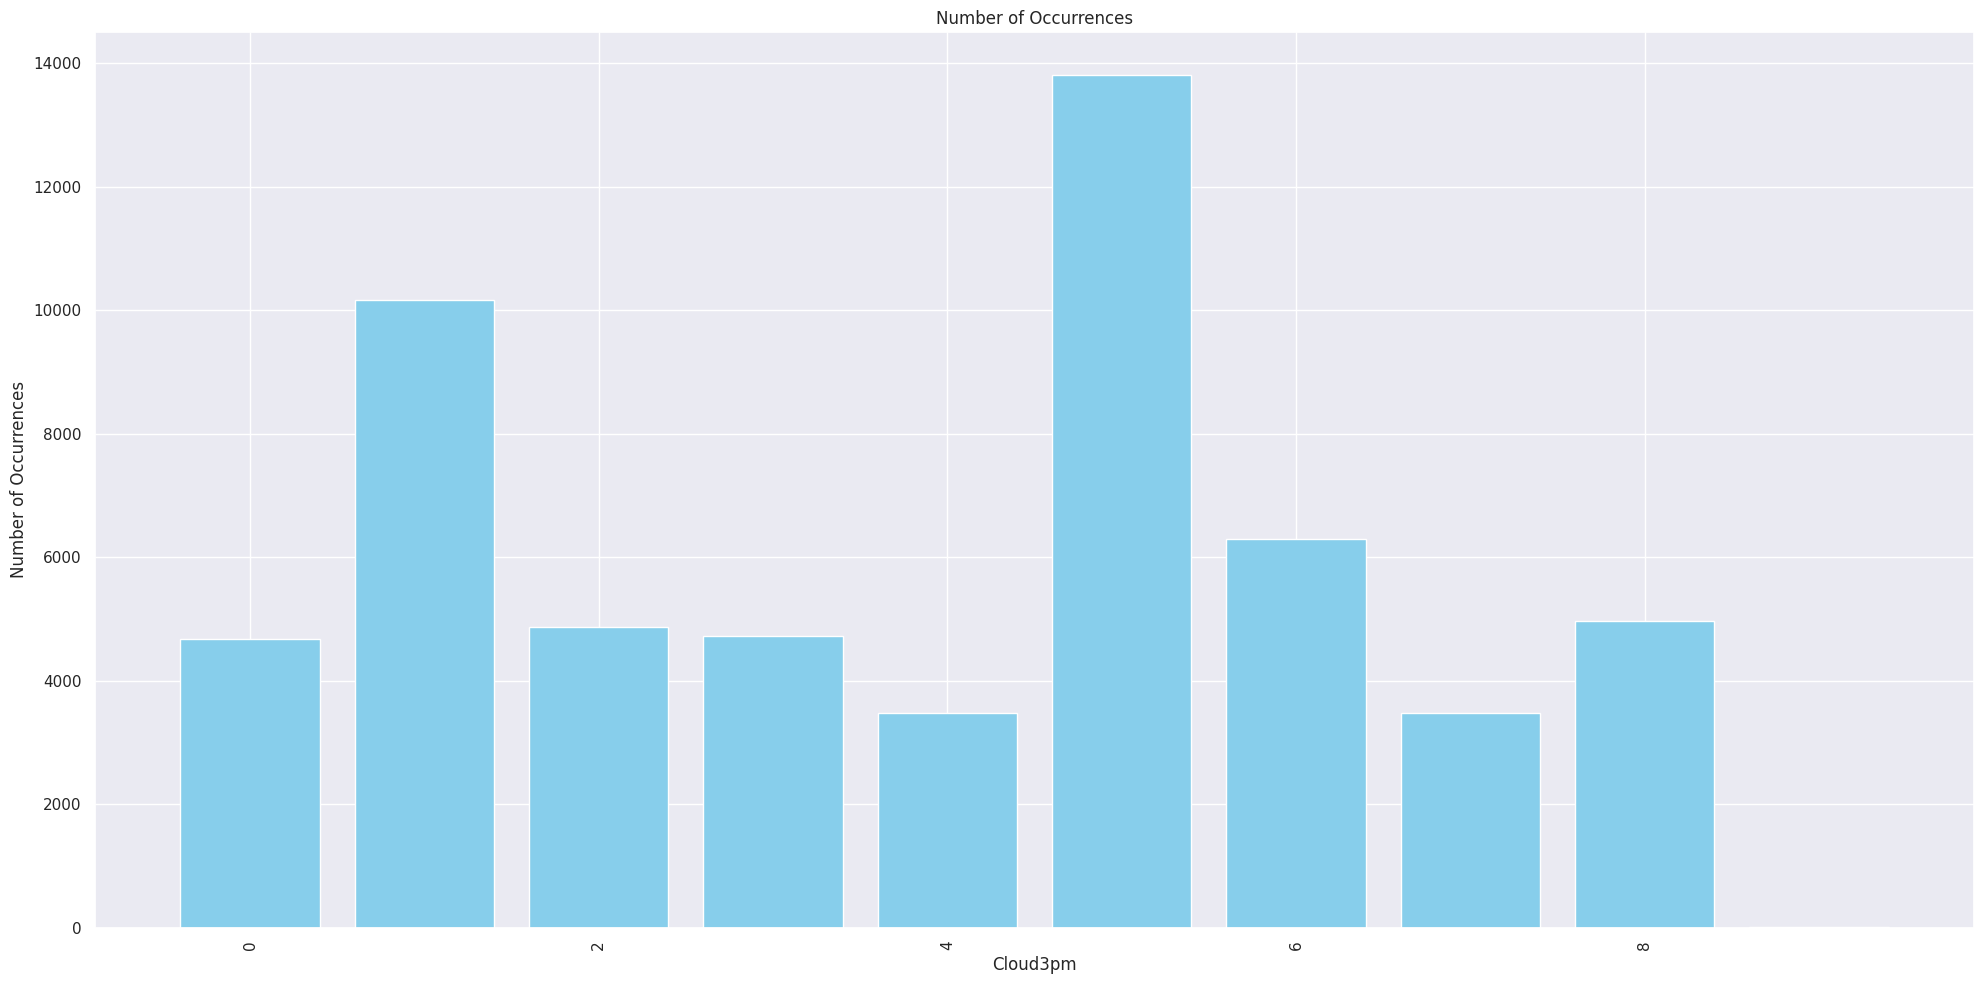

In [48]:
plt.figure(figsize=(20,10))
plt.bar(df['Cloud3pm'].unique(), df['Cloud3pm'].value_counts(), color='skyblue')
plt.xlabel('Cloud3pm')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

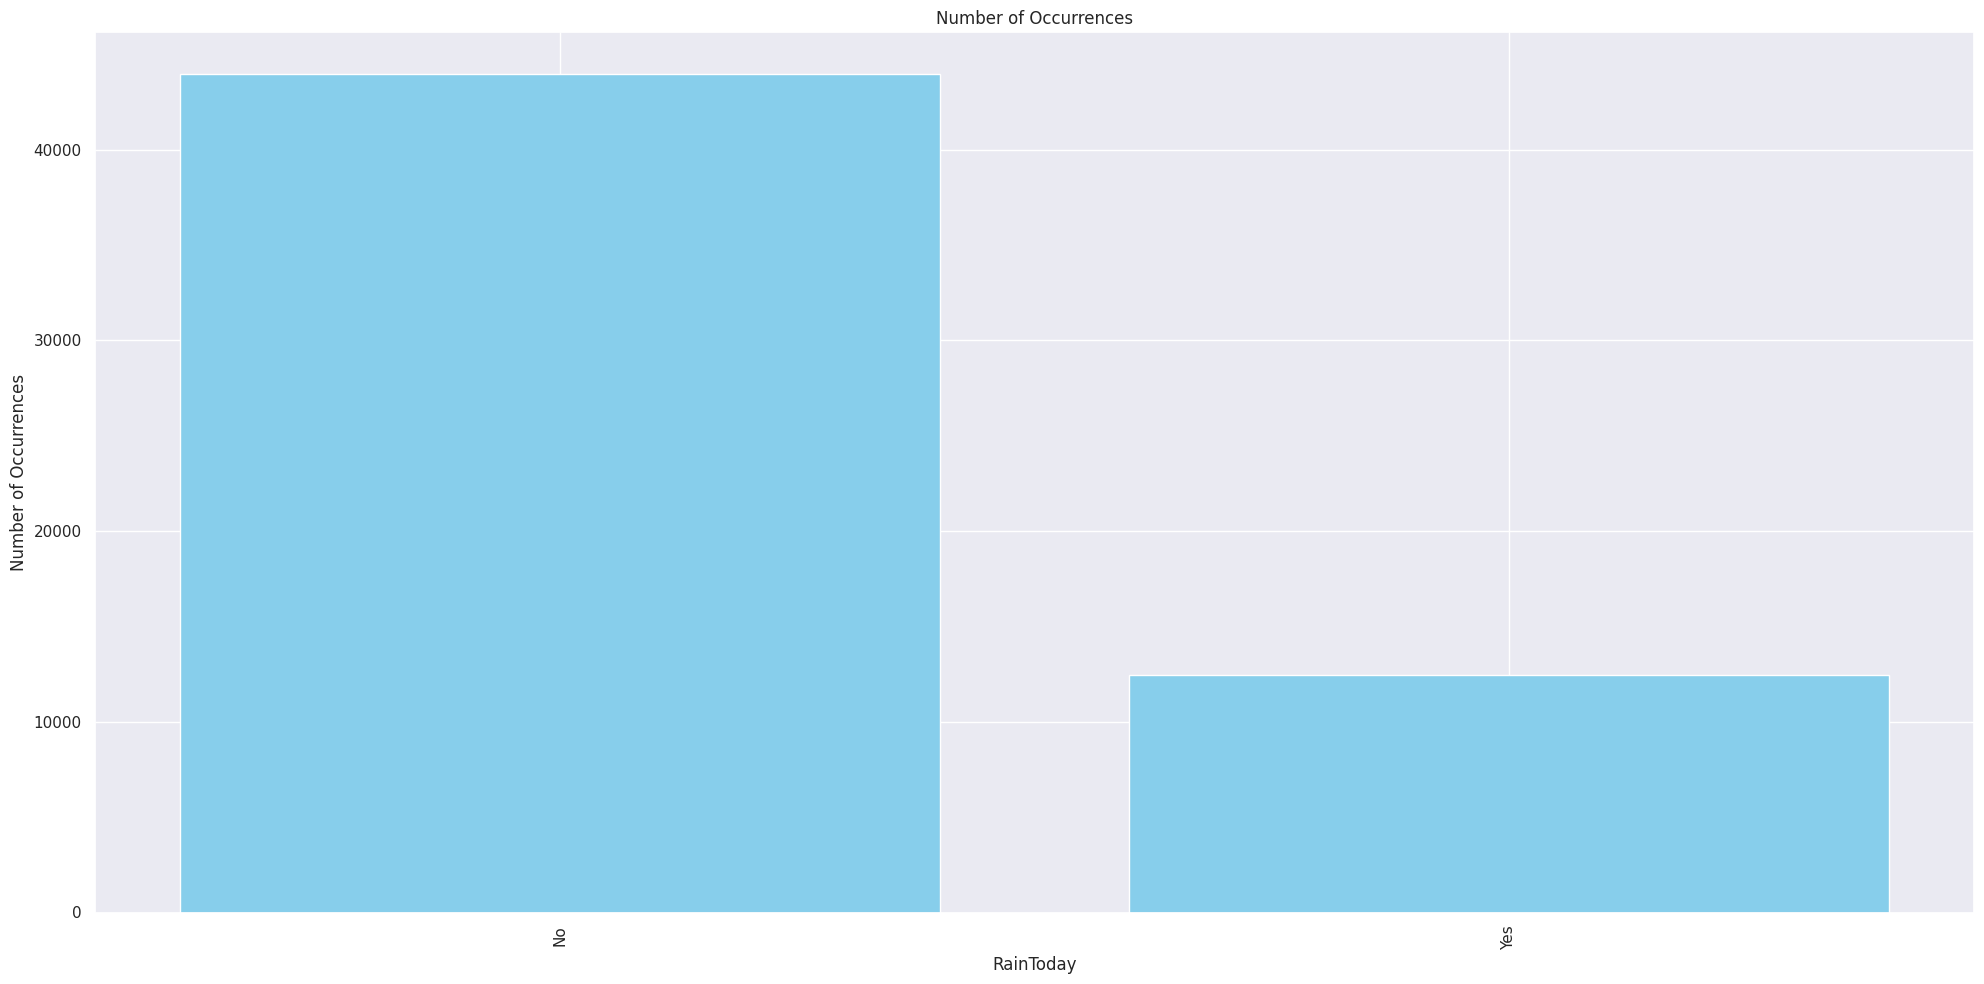

In [49]:
plt.figure(figsize=(20,10))
plt.bar(df['RainToday'].unique(), df['RainToday'].value_counts(), color='skyblue')
plt.xlabel('RainToday')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90) # Rotate x-axis labels to make them readable
plt.title('Number of Occurrences')
plt.tight_layout() # Adjust layout to fit all labels
plt.show()

Quickly check out the Numeric and Categorical predictors separately, as the standard functions behave differently for them.

Here's what we can glean:

*   `Location` appears to have been numerically encoded with values ranging from 0 to 48. The mean and median values suggest a uniform distribution across locations if they are evenly spaced.
*   `WindGustDir`, `WindDir9am`, and `WindDir3pm` represent wind direction at different times and seem to be encoded in a manner where numerical operations can apply, which isn't typical for directional data.
*   `RainToday` and `RainTomorrow` are binary variables, likely indicating the occurrence of rain with `0` for no rain and `1` for rain. The mean close to `0.22` suggests about 22% of days had rain on the same or the next day.
*   `Cloud9am` and `Cloud3pm` might represent cloud coverage encoded to a 0-8 range, where the mean and median values suggest moderate cloudiness on average.



In [50]:
# Numeric Predictors
df_numerical = df.drop(columns=object_columns)
df_numerical.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
6049     17.9     35.2       0.0         12.0      12.3           48.0   
6050     18.4     28.9       0.0         14.8      13.0           37.0   
6052     19.4     37.6       0.0         10.8      10.6           46.0   
6053     21.9     38.4       0.0         11.4      12.2           31.0   
6054     24.2     41.0       0.0         11.2       8.4           35.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
6049           6.0          20.0         20.0         13.0       1006.3   
6050          19.0          19.0         30.0          8.0       1012.9   
6052          30.0          15.0         42.0         22.0       1012.3   
6053           6.0           6.0         37.0         22.0       1012.7   
6054          17.0          13.0         19.0         15.0       1010.7   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
6049       1004.4       2.0       5.0     26.6     33.4  
6050       1012.1       1.0       1.0     20.3     27.0  
6052       1009.2       1.0       6.0     28.7     34.9  
6053       1009.1       1.0       5.0     29.1     35.6  
6054       1007.4       1.0       6.0     33.6     37.6

In [51]:
df_numerical.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180     18.513289     20.197040   
min         9.000000      2.000000      2.000000      0.000000      0.000000   
25%        31.000000      9.000000     13.000000     55.000000     35.000000   
50%        39.000000     15.000000     19.000000     67.000000     50.000000   
75%        48.000000     20.000000     26.000000     79.000000     63.000000   
max       124.000000     67.000000     76.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean    1017.239505   1014.795580      4.241705      4.326515     18.204961   
std        6.909357      6.870892      2.797162      2.647251      6.567991   
min      980.500000    977.100000      0.000000      0.000000     -0.700000   
25%     1012.700000   1010.100000      1.000000      2.000000     13.100000   
50%     1017.200000   1014.700000      5.000000      5.000000     17.800000   
75%     1021.800000   1019.400000      7.000000      7.000000     23.300000   
max     1040.400000   1038.900000      8.000000      9.000000     39.400000   

            Temp3pm  
count  56420.000000  
mean      22.710333  
std        6.836543  
min        3.700000  
25%       17.400000  
50%       22.400000  
75%       27.900000  
max       46.100000

Ok, we have a preliminary statistical summary of the dataset. From this, we can deduce the nature and scale of the variables.

*   `MinTemp` and `MaxTemp` appear to measure temperature, likely in degrees Celsius, given the range of values. The average `MinTemp` is about 13 degrees, while the average `MaxTemp` is around 24 degrees.
*   `Rainfall` suggests precipitation measurements, which seem to be in millimeters, given that the mean is 2.13 with a max of 206 mm.
*   `Evaporation` and `Sunshine` are possibly measured in millimeters and hours per day, respectively, inferred from their averages and scale.
*   Wind speed-related variables (`WindGustSpeed`, `WindSpeed9am`, and `WindSpeed3pm`) seem to be in kilometers per hour, with means ranging from 14 to nearly 40 km/h.
*   `Humidity9am` and `Humidity3pm` are likely percentages, with their 50th percentile (median) values suggesting typical morning and afternoon humidity levels.
*   `Pressure9am` and `Pressure3pm` could represent atmospheric pressure in hectopascals, with averages around 1017 hPa, typical for weather station readings.
*   `Temp9am` and `Temp3pm` further confirm daily temperature ranges, aligning with `MinTemp` and `MaxTemp`.



## Correlation

In [53]:
# Converting Label
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

<ipython-input-53-e2f3147531c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})


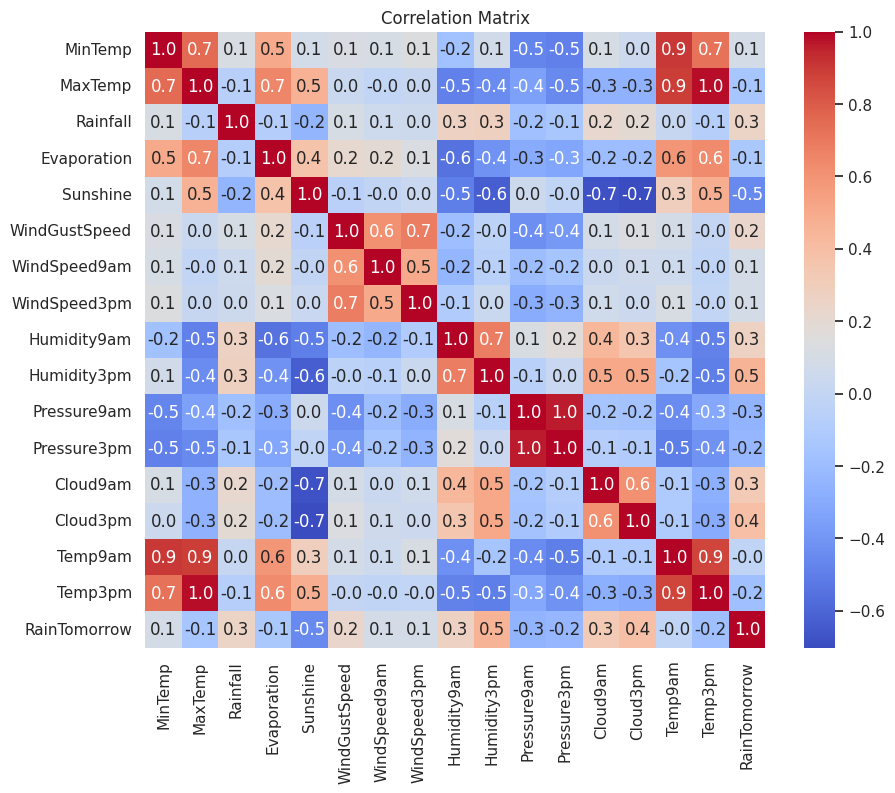

In [55]:
# Calculate the correlation matrix
correlation_matrix = pd.concat([df_numerical, df['RainTomorrow']], axis=1).corr()

# Display the correlation matrix
correlation_matrix

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

From our feature engineering, it seems like we can use
- `Humidity3pm`: `Humidity3pm` shows a good level of correlation with other features and can be an indicator of rain. Since humidity is related to the presence of moisture in the air, it can be a predictive factor for rain.
- `Sunshine` shows a good level of correlation with other features and can be an indicator of rain. Since when it is sunny, the likelihood of having rain is low, so it can be a predictive factor for rain.

`Humidity3pm` and `Sunshine` to predict whether Tomorrow will rain or not (as they have highest correlation in with `RainTomorrow`). Let's do it again

# Removing outliers for better predictors

Now, we will remove some outliers, based on some concepts learned from the SC1015 mod.

<Axes: xlabel='Humidity3pm', ylabel='Count'>

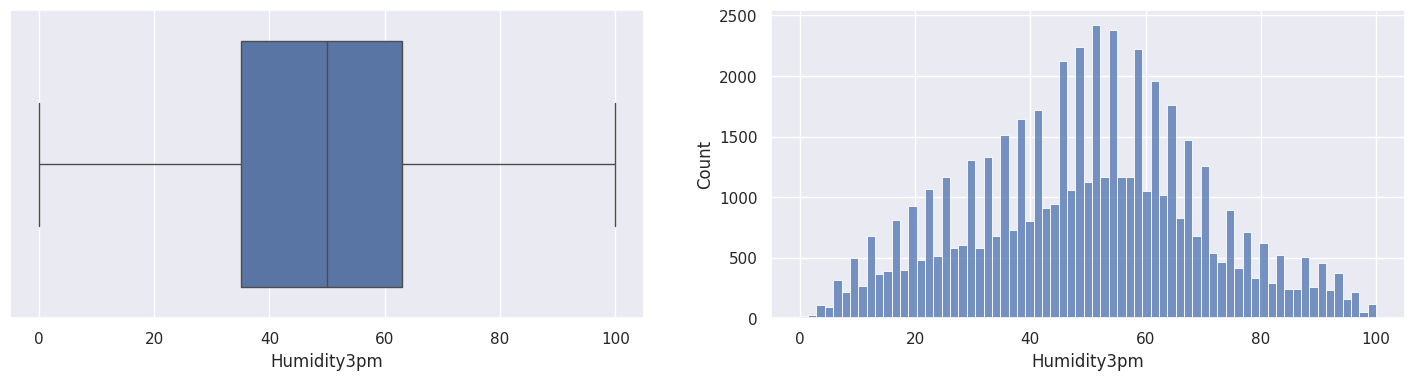

In [56]:
# Drawing for removing outliers of Humidity3pm
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df_numerical['Humidity3pm'], orient = "h", ax = axes[0])
sb.histplot(data = df_numerical['Humidity3pm'], ax = axes[1])

As we can see, the data is quite good, as we have done the part for preprocessing data using KNN Impute. Then we will do the part removing `Sunshine`, if having

<Axes: xlabel='Sunshine', ylabel='Count'>

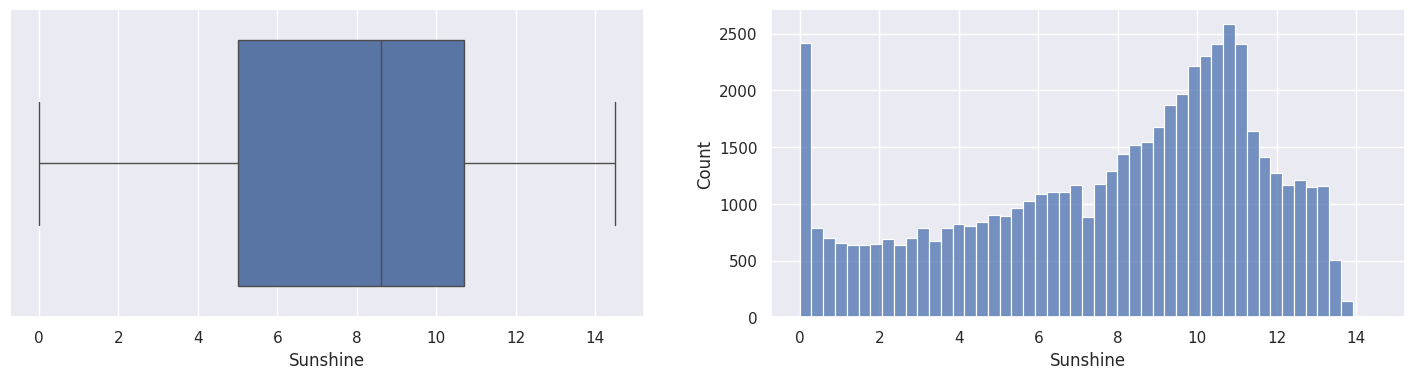

In [60]:
# Drawing for removing outliers of Humidity3pm
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = df_numerical['Sunshine'], orient = "h", ax = axes[0])
sb.histplot(data = df_numerical['Sunshine'], ax = axes[1])

Then I will write a helper function for plotting these plots for numerical colmns

In [68]:
numerical_columns = [x for x in df.columns if x not in object_columns]
numerical_columns.remove('Cloud9am')
numerical_columns.remove('Cloud3pm') # remove as categorical values

In [69]:
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

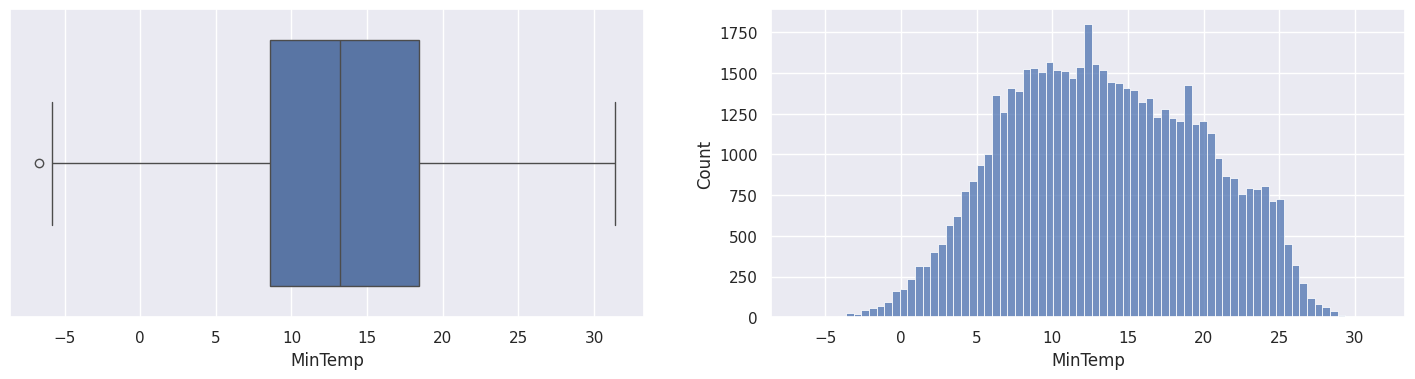

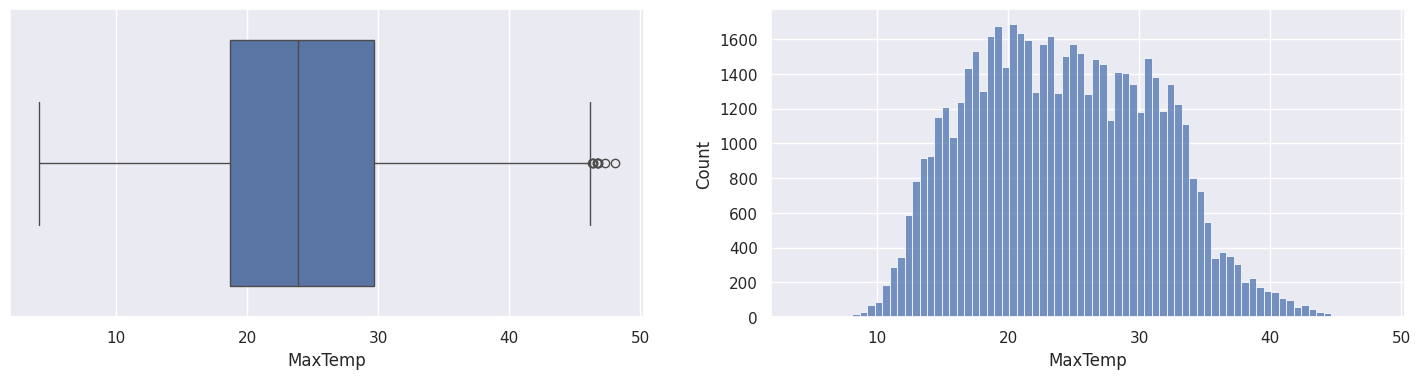

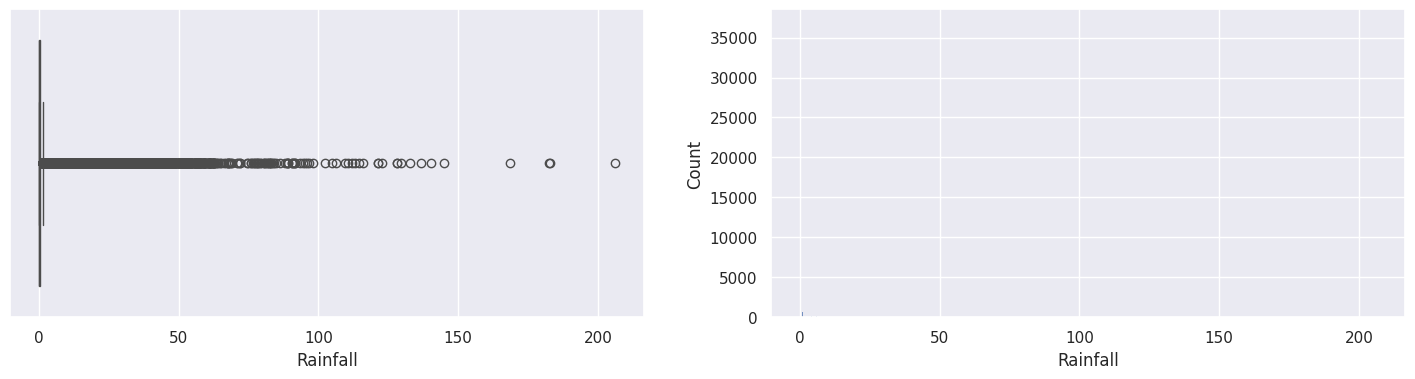

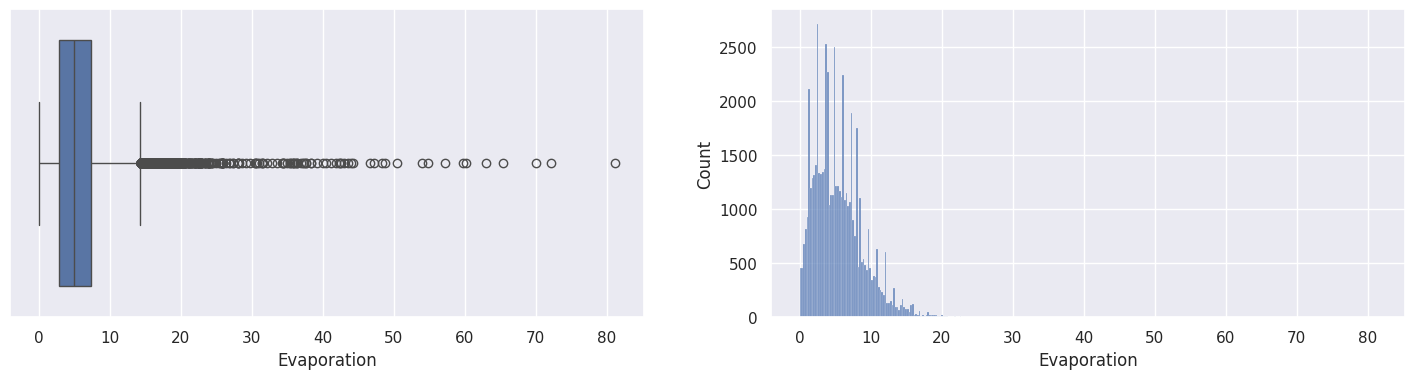

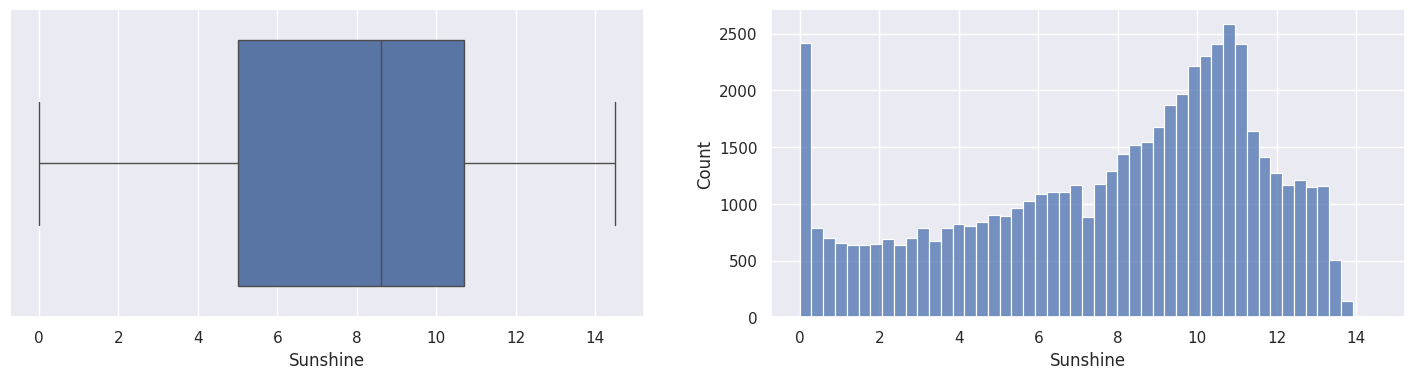

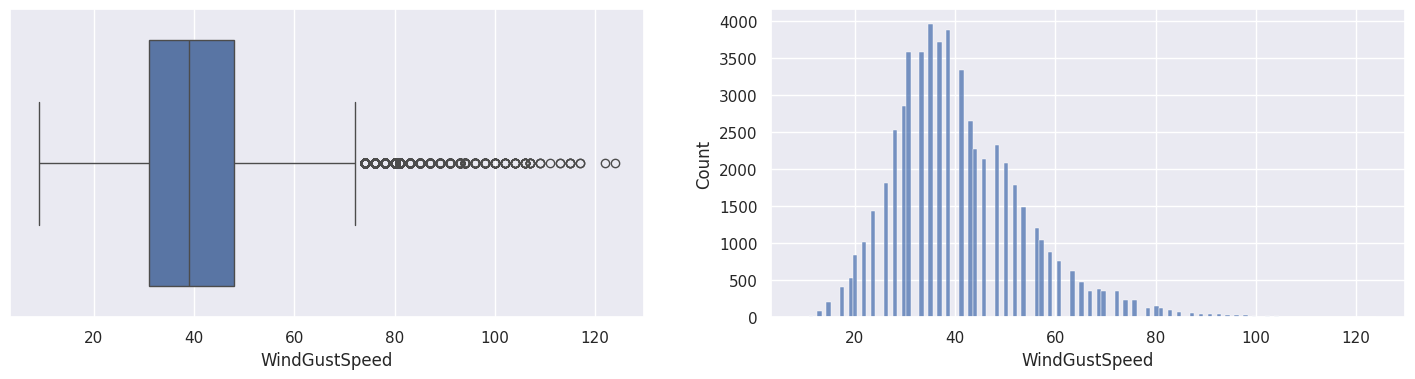

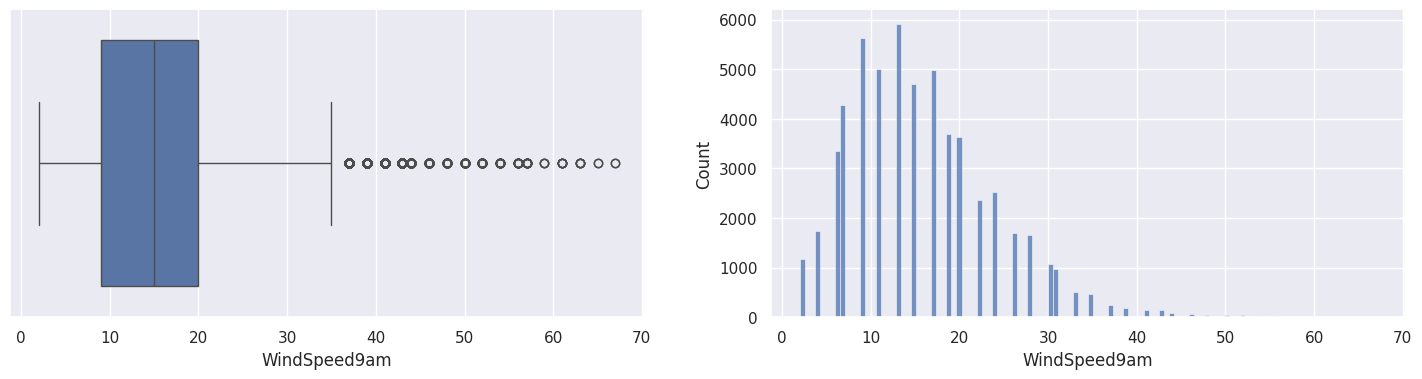

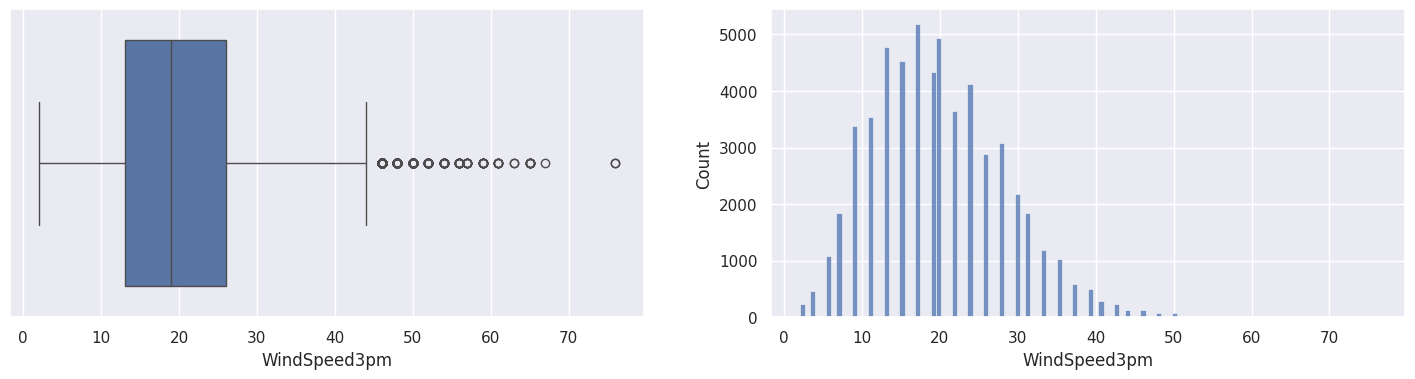

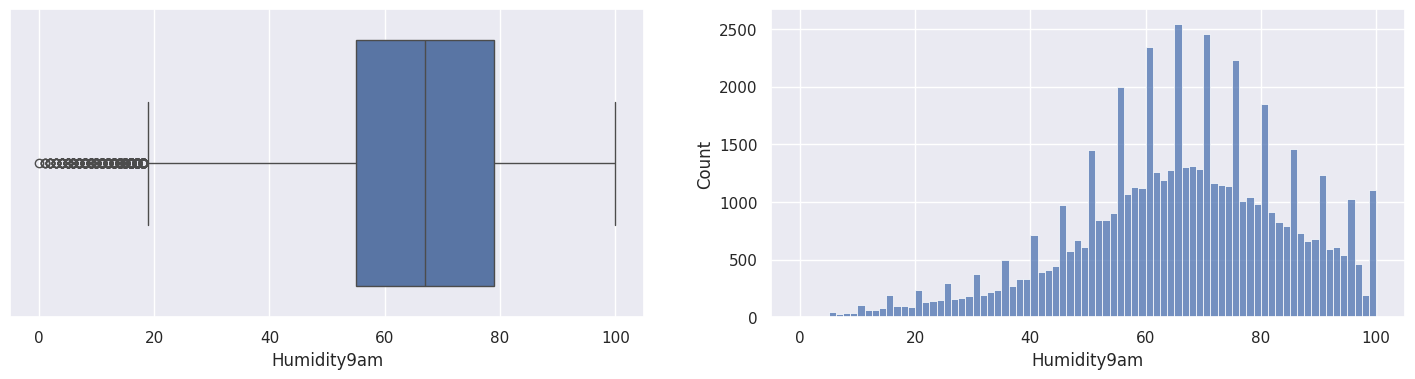

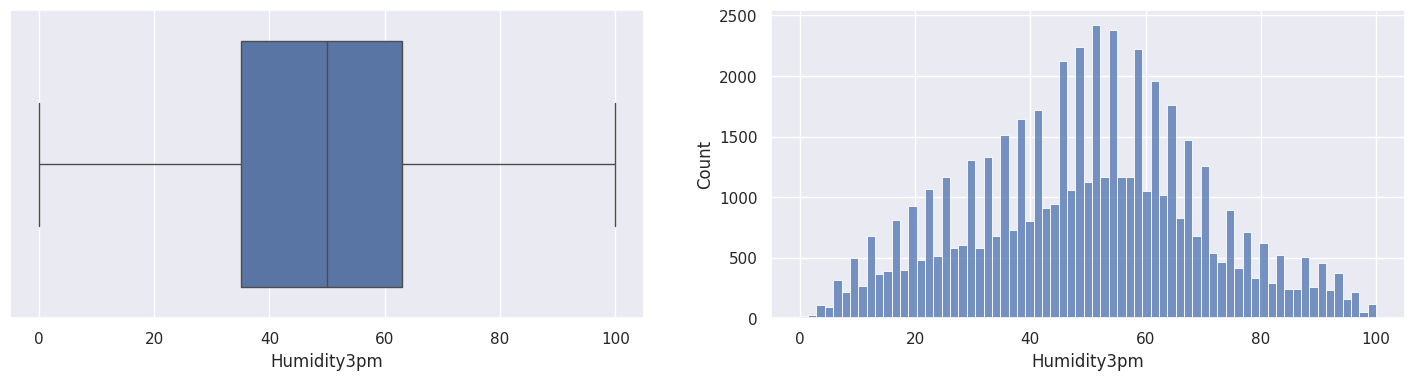

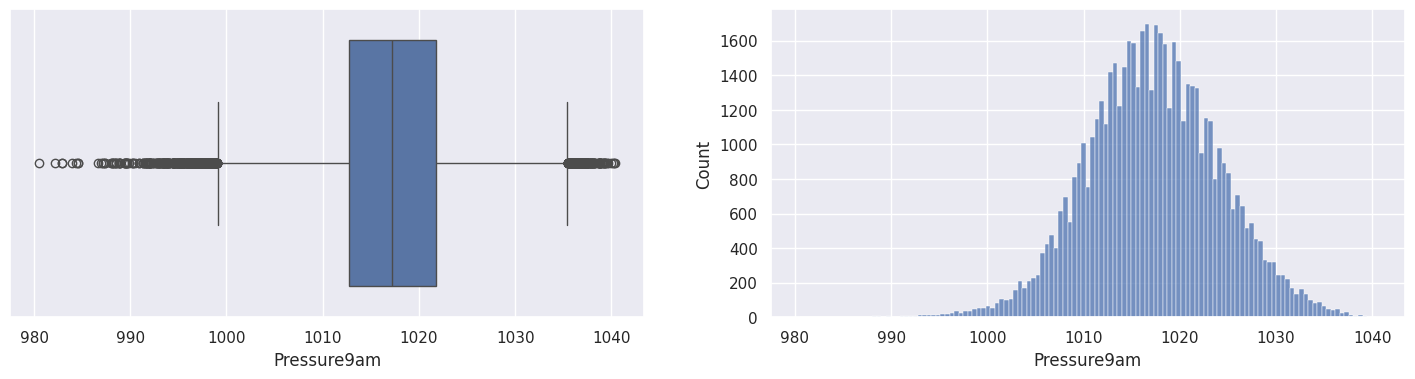

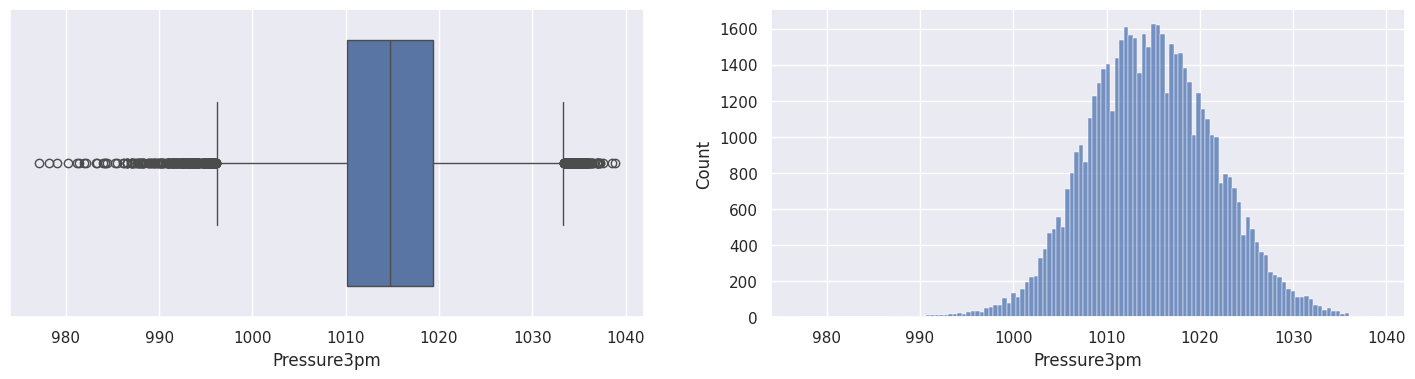

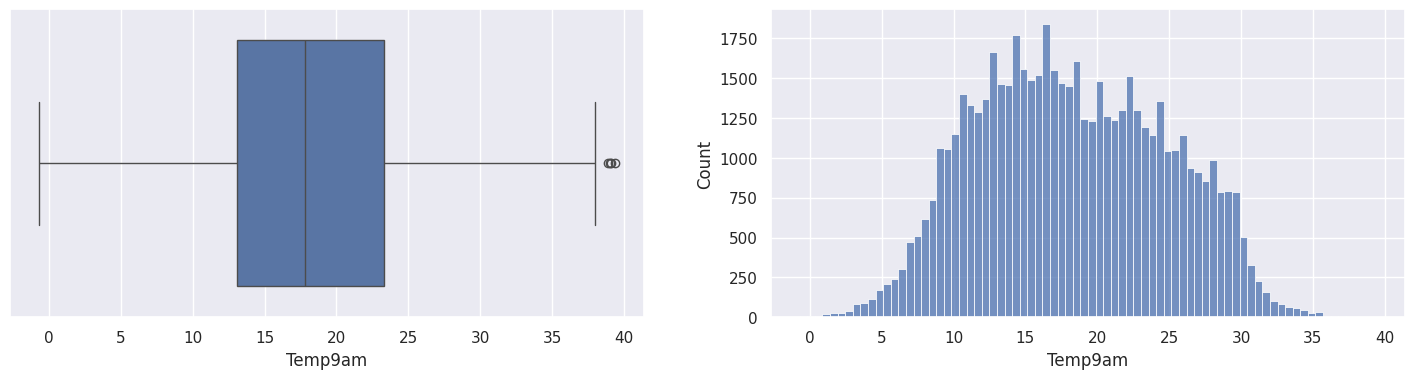

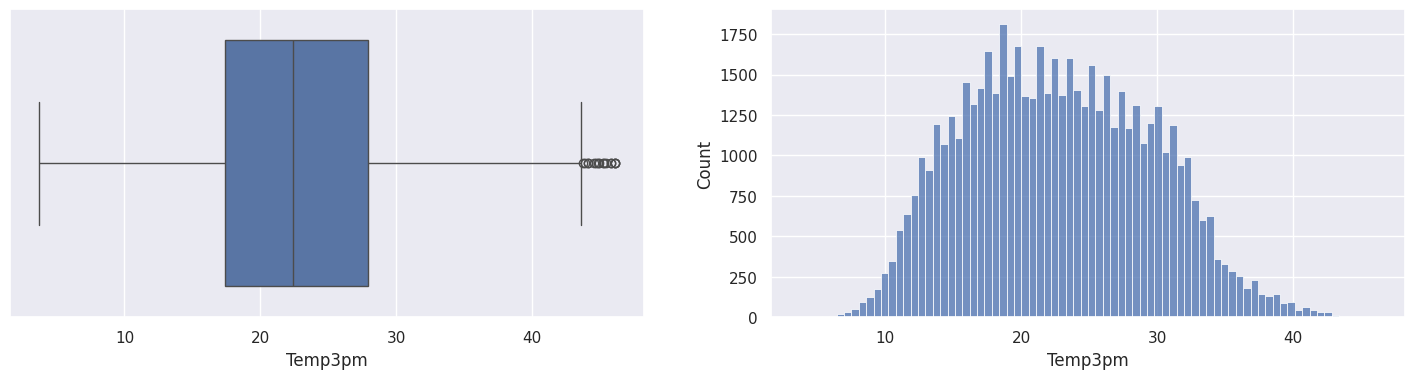

In [70]:
for col in numerical_columns:
    # Drawing for removing outliers of Humidity3pm
    f, axes = plt.subplots(1, 2, figsize=(18, 4))
    sb.boxplot(data = df_numerical[col], orient = "h", ax = axes[0])
    sb.histplot(data = df_numerical[col], ax = axes[1])

From our observations, we can see that there have been outliers in `Evaporation`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Temp9am`, `Temp3pm`, we will perform remove outliers so that our data can be much clean

In [77]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    return df

In [78]:
outlier_cols = ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
print(f'Length of dataset before removing: ', len(df_numerical))
df_filtered = remove_outliers(df, outlier_cols)
print(f'Length of dataset after removing: ', len(df_filtered))

Length of dataset before removing:  56420
Length of dataset after removing:  51448


In [80]:
df_filtered.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6055  2009-01-07    Cobar     27.1     36.1       0.0         13.0       0.0   
6056  2009-01-08    Cobar     23.3     34.0       0.0          9.8      12.6   
6058  2009-01-10    Cobar     19.0     35.5       0.0         12.0      12.3   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6052         NNE           46.0        NNE  ...        42.0         22.0   
6053         WNW           31.0        WNW  ...        37.0         22.0   
6055           N           43.0          N  ...        26.0         19.0   
6056         SSW           41.0          S  ...        33.0         15.0   
6058         ENE           48.0        ENE  ...        46.0         28.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6052       1012.3       1009.2       1.0       6.0     28.7     34.9   
6053       1012.7       1009.1       1.0       5.0     29.1     35.6   
6055       1007.7       1007.4       8.0       8.0     30.7     34.3   
6056       1011.3       1009.9       3.0       1.0     25.0     31.5   
6058       1008.3       1004.0       1.0       5.0     23.4     33.3   

      RainToday  RainTomorrow  
6052         No             0  
6053         No             0  
6055         No             0  
6056         No             0  
6058         No             0  

[5 rows x 23 columns]

Then, we will save our new dataset for model usage.

In [81]:
df_filtered.to_csv('weather_AUS_clf.csv' ,index=False)